<a href="https://colab.research.google.com/github/UmaimahAKhan/Pakistan-s-Largest-Ecommerce-oders-dataset/blob/main/EDA_on_Pakistani_E_commerce_Orders_data_in_various_categories_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import files

# This will prompt you to upload the file
uploaded = files.upload()

# Now you can read the file as a pandas dataframe
import pandas as pd

# Assuming the file is uploaded and you use the filename from uploaded
df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')

# Check the data
df.head()


Saving Pakistan Largest Ecommerce Dataset.csv to Pakistan Largest Ecommerce Dataset (1).csv


<ipython-input-11-f8987d87848a>:10: DtypeWarning: Columns (1,2,3,7,8,9,11,12,13,14,17,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Pakistan Largest Ecommerce Dataset.csv')


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [12]:
# Check for missing values
print(df.isnull().sum())

# Fill missing values
df.fillna({
    'price': 0,                       # Replace missing prices with 0
    'qty_ordered': 0,                 # Replace missing quantity with 0
    'grand_total': 0,                 # Replace missing totals with 0
    'discount_amount': 0,             # Replace missing discounts with 0
    'payment_method': 'Unknown',      # Replace missing payment method with 'Unknown'
    'category_name_1': 'Unknown'      # Replace missing category with 'Unknown'
}, inplace=True)

# Alternatively, if you want to drop rows with missing values:
# df.dropna(inplace=True)


item_id                   464051
status                    464066
created_at                464051
sku                       464071
price                     464051
qty_ordered               464051
grand_total               464051
increment_id              464051
category_name_1           464215
sales_commission_code     601229
discount_amount           464051
payment_method            464051
Working Date              464051
BI Status                 464051
 MV                       464051
Year                      464051
Month                     464051
Customer Since            464062
M-Y                       464051
FY                        464051
Customer ID               464062
Unnamed: 21              1048575
Unnamed: 22              1048575
Unnamed: 23              1048575
Unnamed: 24              1048575
Unnamed: 25              1048575
dtype: int64


In [14]:
# Convert date fields to datetime objects
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df['Working Date'] = pd.to_datetime(df['Working Date'], errors='coerce')

# Handle missing or invalid dates (optional)
df['created_at'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
df['Working Date'].fillna(pd.Timestamp('1900-01-01'), inplace=True)


<ipython-input-14-35e888b23eee>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['created_at'].fillna(pd.Timestamp('1900-01-01'), inplace=True)
<ipython-input-14-35e888b23eee>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [15]:
# Remove duplicate rows if any
df.drop_duplicates(inplace=True)


In [16]:
# Standardize column names
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [17]:
# Remove unrealistic or invalid values (e.g., negative prices)
df = df[df['price'] > 0]
df = df[df['qty_ordered'] > 0]


In [18]:
# Clean payment method field
df['payment_method'] = df['payment_method'].str.strip().str.title()

# Clean category names and replace missing with 'Unknown'
df['category_name_1'] = df['category_name_1'].fillna('Unknown').str.strip().str.title()


In [19]:
# Check the cleaned dataset
print(df.head())
print(df.info())  # Check if the data types are correct


    item_id          status created_at  \
0  211131.0        complete 2016-07-01   
1  211133.0        canceled 2016-07-01   
2  211134.0        canceled 2016-07-01   
3  211135.0        complete 2016-07-01   
4  211136.0  order_refunded 2016-07-01   

                                                 sku   price  qty_ordered  \
0                                  kreations_YI 06-L  1950.0          1.0   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0          1.0   
2                                 Ego_UP0017-999-MR0  2450.0          1.0   
3                                     kcc_krone deal   360.0          1.0   
4                                        BK7010400AG   555.0          2.0   

   grand_total increment_id    category_name_1 sales_commission_code  ...  \
0       1950.0    100147443    Women'S Fashion                    \N  ...   
1        240.0    100147444  Beauty & Grooming                    \N  ...   
2       2450.0    100147445    Women'S Fashion       

In [20]:
# Check the current data types
print(df.dtypes)

# Fill NaN values with 0 (if necessary)
df['item_id'].fillna(0, inplace=True)
df['qty_ordered'].fillna(0, inplace=True)
df['month'].fillna(0, inplace=True)
df['customer_id'].fillna(0, inplace=True)

# Convert specific columns from float64 to int
df['item_id'] = df['item_id'].astype('int')
df['qty_ordered'] = df['qty_ordered'].astype('int')
df['month'] = df['month'].astype('int')
df['customer_id'] = df['customer_id'].astype('int')

# Verify the changes
print(df.dtypes)


item_id                         float64
status                           object
created_at               datetime64[ns]
sku                              object
price                           float64
qty_ordered                     float64
grand_total                     float64
increment_id                     object
category_name_1                  object
sales_commission_code            object
discount_amount                 float64
payment_method                   object
working_date             datetime64[ns]
bi_status                        object
_mv_                             object
year                            float64
month                           float64
customer_since                   object
m-y                              object
fy                               object
customer_id                     float64
unnamed:_21                     float64
unnamed:_22                     float64
unnamed:_23                     float64
unnamed:_24                     float64


<ipython-input-20-587f63837dcc>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['item_id'].fillna(0, inplace=True)
<ipython-input-20-587f63837dcc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [21]:
print(df.head())

   item_id          status created_at  \
0   211131        complete 2016-07-01   
1   211133        canceled 2016-07-01   
2   211134        canceled 2016-07-01   
3   211135        complete 2016-07-01   
4   211136  order_refunded 2016-07-01   

                                                 sku   price  qty_ordered  \
0                                  kreations_YI 06-L  1950.0            1   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0            1   
2                                 Ego_UP0017-999-MR0  2450.0            1   
3                                     kcc_krone deal   360.0            1   
4                                        BK7010400AG   555.0            2   

   grand_total increment_id    category_name_1 sales_commission_code  ...  \
0       1950.0    100147443    Women'S Fashion                    \N  ...   
1        240.0    100147444  Beauty & Grooming                    \N  ...   
2       2450.0    100147445    Women'S Fashion             

In [22]:
# Check the original DataFrame columns
print("Original Columns:")
print(df.columns)

# Drop the last 5 columns
df.drop(columns=df.columns[-5:], inplace=True)

# Check the DataFrame after dropping the columns
print("Columns after dropping last 5:")
print(df.columns)


Original Columns:
Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'working_date', 'bi_status', '_mv_', 'year', 'month', 'customer_since',
       'm-y', 'fy', 'customer_id', 'unnamed:_21', 'unnamed:_22', 'unnamed:_23',
       'unnamed:_24', 'unnamed:_25'],
      dtype='object')
Columns after dropping last 5:
Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'working_date', 'bi_status', '_mv_', 'year', 'month', 'customer_since',
       'm-y', 'fy', 'customer_id'],
      dtype='object')


In [23]:
# Create the fact table
fact_order = df[['item_id', 'status', 'qty_ordered','created_at','bi_status','payment_method','sku', 'grand_total', 'customer_id', '_mv_']].copy()
print("Fact Order:")
print(fact_order.head())


Fact Order:
   item_id          status  qty_ordered created_at bi_status payment_method  \
0   211131        complete            1 2016-07-01     #REF!            Cod   
1   211133        canceled            1 2016-07-01     Gross            Cod   
2   211134        canceled            1 2016-07-01     Gross            Cod   
3   211135        complete            1 2016-07-01       Net            Cod   
4   211136  order_refunded            2 2016-07-01     Valid            Cod   

                                                 sku  grand_total  \
0                                  kreations_YI 06-L       1950.0   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...        240.0   
2                                 Ego_UP0017-999-MR0       2450.0   
3                                     kcc_krone deal         60.0   
4                                        BK7010400AG       1110.0   

   customer_id     _mv_  
0            1   1,950   
1            2     240   
2            3   2,4

In [24]:
# Create the product dimension table
product_dimension = df[['sku', 'price', 'sales_commission_code', 'discount_amount', 'category_name_1']].drop_duplicates().reset_index(drop=True)
print("Product Dimension:")
print(product_dimension.head())

# Create the customer dimension table
customer_dimension = df[['customer_id', 'customer_since']].drop_duplicates().reset_index(drop=True)
print("Customer Dimension:")
print(customer_dimension.head())

# Create the date dimension table
date_dimension = df[['created_at','fy', 'working_date']].copy()
date_dimension['year'] = date_dimension['created_at'].dt.year
date_dimension['month'] = date_dimension['created_at'].dt.month
date_dimension['day'] = date_dimension['created_at'].dt.day
date_dimension = date_dimension.drop_duplicates().reset_index(drop=True)
print("Date Dimension:")
print(date_dimension.head())


Product Dimension:
                                                 sku   price  \
0                                  kreations_YI 06-L  1950.0   
1  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0   
2                                 Ego_UP0017-999-MR0  2450.0   
3                                     kcc_krone deal   360.0   
4                                        BK7010400AG   555.0   

  sales_commission_code  discount_amount    category_name_1  
0                    \N              0.0    Women'S Fashion  
1                    \N              0.0  Beauty & Grooming  
2                    \N              0.0    Women'S Fashion  
3           R-FSD-52352            300.0  Beauty & Grooming  
4                    \N              0.0            Soghaat  
Customer Dimension:
   customer_id customer_since
0            1         2016-7
1            2         2016-7
2            3         2016-7
3            4         2016-7
4            5         2016-7
Date Dimension:
  create

In [25]:
#checking printing a table to see if the code is working
print(product_dimension)

                                                      sku   price  \
0                                       kreations_YI 06-L  1950.0   
1       kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...   240.0   
2                                      Ego_UP0017-999-MR0  2450.0   
3                                          kcc_krone deal   360.0   
4                                             BK7010400AG   555.0   
...                                                   ...     ...   
222156                                SADBWH5B74016CC02D8   300.0   
222157                                MEFPAK5B360B03C6B72   999.0   
222158                              WOFVAL59D5EA84167F9-M   400.0   
222159                              WOFNIG5B4D7EB0E9FDD-L   499.0   
222160                                WOFSCE5AE00357AECDE   699.0   

       sales_commission_code  discount_amount     category_name_1  
0                         \N              0.0     Women'S Fashion  
1                         \N       

In [26]:
# Merge the fact table with the product dimension to get category names
merged_data = pd.merge(fact_order, product_dimension, on='sku', how='inner')

# Check the merged data
print(merged_data.head())

# Group by category and sum the quantity ordered
category_sales = merged_data.groupby('category_name_1')['qty_ordered'].sum().reset_index()

# Sort to find the best-selling category
best_selling_category = category_sales.sort_values(by='qty_ordered', ascending=False).head(1)

# Display the best-selling category
print("Best-Selling Category:")
print(best_selling_category)



   item_id    status  qty_ordered created_at bi_status payment_method  \
0   211131  complete            1 2016-07-01     #REF!            Cod   
1   211131  complete            1 2016-07-01     #REF!            Cod   
2   211133  canceled            1 2016-07-01     Gross            Cod   
3   211133  canceled            1 2016-07-01     Gross            Cod   
4   211133  canceled            1 2016-07-01     Gross            Cod   

                                                 sku  grand_total  \
0                                  kreations_YI 06-L       1950.0   
1                                  kreations_YI 06-L       1950.0   
2  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...        240.0   
3  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...        240.0   
4  kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...        240.0   

   customer_id     _mv_   price sales_commission_code  discount_amount  \
0            1   1,950   1950.0                    \N              0.0  

<ipython-input-27-c66e9c555c72>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='qty_ordered', y='category_name_1', data=category_sales, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: 

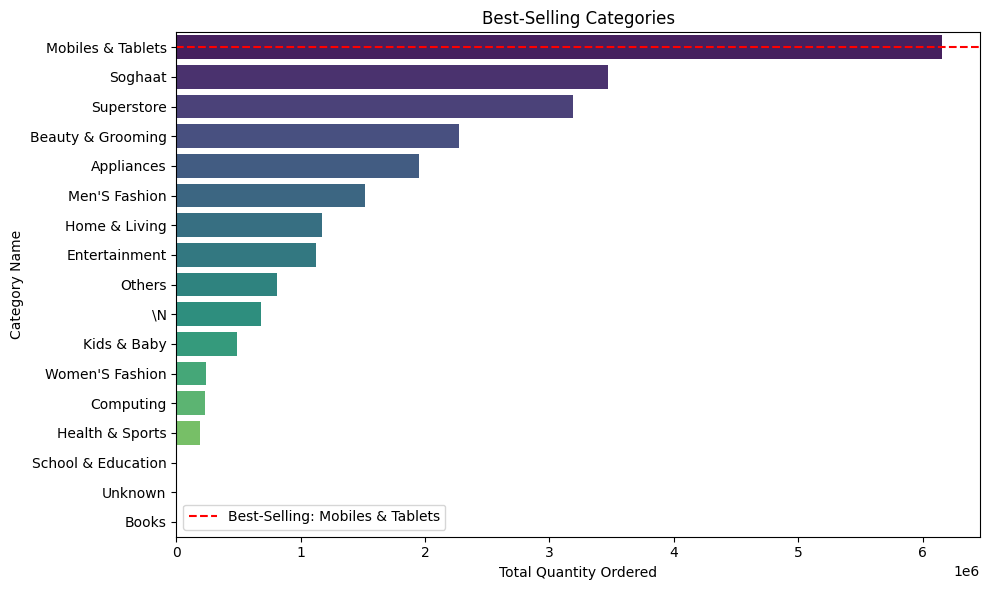

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Merge fact_order and product_dimension tables
merged_data = pd.merge(fact_order, product_dimension, on='sku', how='inner')

# Step 2: Group by category and sum the sales quantity
category_sales = merged_data.groupby('category_name_1')['qty_ordered'].sum().reset_index()

# Step 3: Sort categories by sales quantity
category_sales = category_sales.sort_values(by='qty_ordered', ascending=False)

# Step 4: Plot the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='qty_ordered', y='category_name_1', data=category_sales, palette='viridis')

# Add labels and title
plt.xlabel('Total Quantity Ordered')
plt.ylabel('Category Name')
plt.title('Best-Selling Categories')

# Highlight the best-selling category
best_selling_category = category_sales.iloc[0]
plt.axhline(y=0, color='r', linestyle='--', label=f"Best-Selling: {best_selling_category['category_name_1']}")

# Show plot
plt.legend()
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

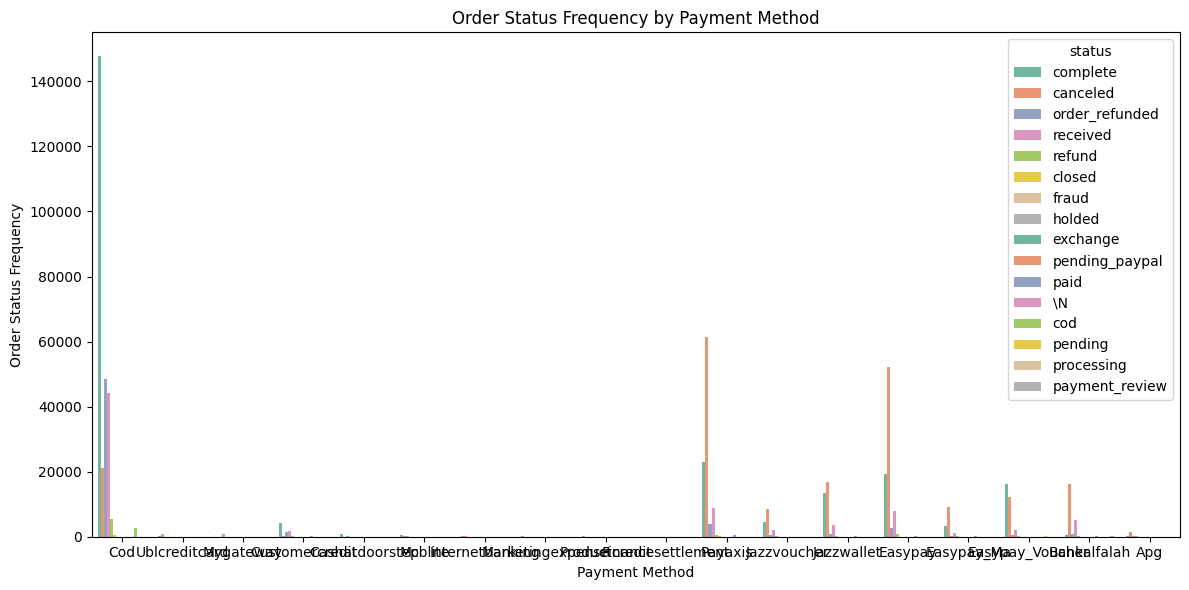

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Group and count frequencies of payment method and order status
# Assuming your columns are named 'payment_method' and 'status' in the dataset
plt.figure(figsize=(12, 6))

# Step 2: Create a count plot for Payment Method vs. Order Status
sns.countplot(x='payment_method', hue='status', data=fact_order, palette='Set2')

# Step 3: Add labels and title
plt.xlabel('Payment Method')
plt.ylabel('Order Status Frequency')
plt.title('Order Status Frequency by Payment Method')

# Show plot
plt.tight_layout()
plt.show()


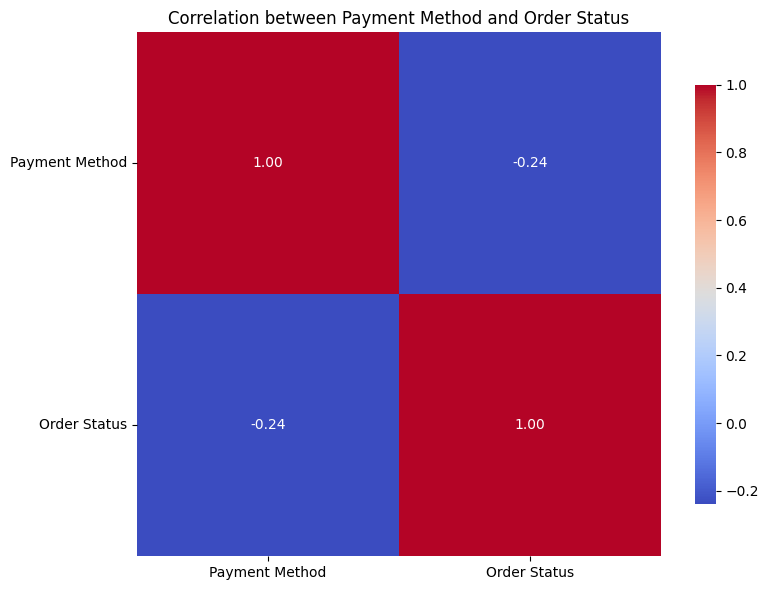

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Step 1: Encode the categorical variables
le_payment = LabelEncoder()
le_status = LabelEncoder()

# Assuming your columns are named 'payment_method' and 'status'
fact_order['payment_method_encoded'] = le_payment.fit_transform(fact_order['payment_method'])
fact_order['status_encoded'] = le_status.fit_transform(fact_order['status'])

# Step 2: Calculate the correlation
correlation = fact_order[['payment_method_encoded', 'status_encoded']].corr()

# Step 3: Visualize the correlation using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

# Add titles and labels
plt.title('Correlation between Payment Method and Order Status')
plt.xticks(ticks=[0.5, 1.5], labels=['Payment Method', 'Order Status'])
plt.yticks(ticks=[0.5, 1.5], labels=['Payment Method', 'Order Status'], rotation=0)

# Show plot
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

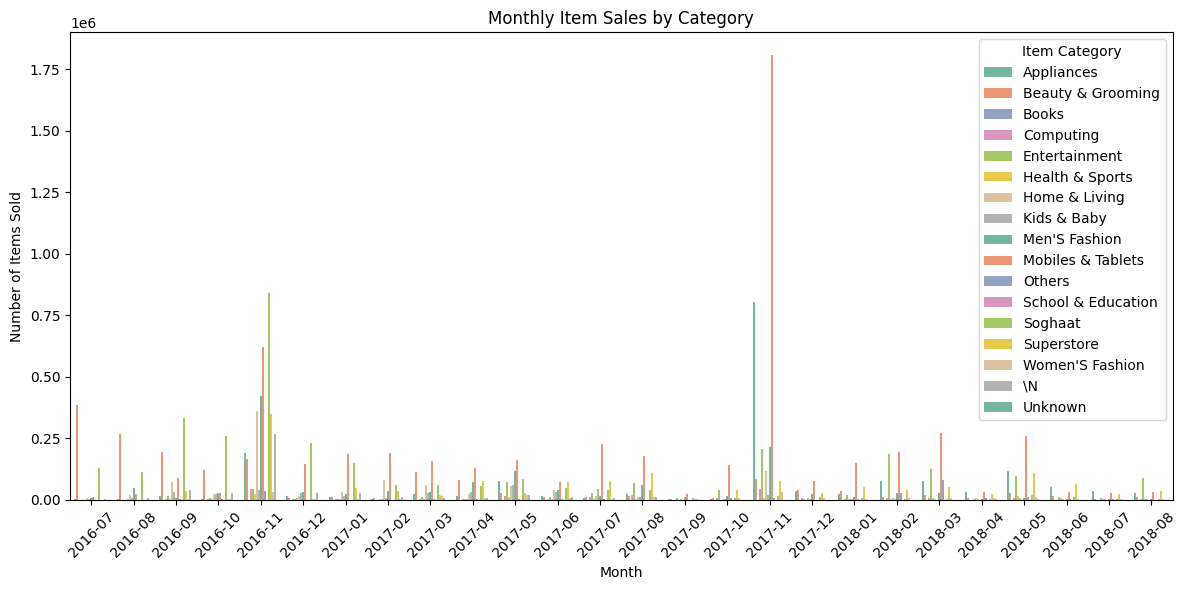

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Merge fact_order with product_dimension to get category names
merged_data = pd.merge(fact_order, product_dimension, on='sku', how='inner')

# Step 2: Convert 'created_at' to datetime if it's not already
merged_data['created_at'] = pd.to_datetime(merged_data['created_at'])

# Step 3: Extract the month from the created_at date
merged_data['month'] = merged_data['created_at'].dt.to_period('M')

# Step 4: Group by month and category, then count the number of items sold
category_sales = merged_data.groupby(['month', 'category_name_1']).size().reset_index(name='order_count')

# Step 5: Visualize using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=category_sales, x='month', y='order_count', hue='category_name_1', palette='Set2')

# Step 6: Add titles and labels
plt.title('Monthly Item Sales by Category')
plt.xlabel('Month')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.legend(title='Item Category')

# Show plot
plt.tight_layout()
plt.show()
